<img src='https://ukmc.ac.id/wp-content/themes/ukmc/images/logo.svg'>

<h1>Workshop Implementasi Data Mining untuk Bisnis - Klasifikasi</h1>
<h2>Disampaikan oleh: Dr. Eng. Farrikh Alzami, M.Kom</h2>
<h3>Rabu 19 Juni 2024 - Online Zoom</h3>
<body>
<p> Apa yang dipelajari pada sesi ini:
<ol>
<li>Memahami pembersihan data</li>
<li>memahami konsep data normal</li>
<li>memahami korelasi fitur sederhana</li>
<li>memahami data tidak seimbang</li>
</ol>
</p>
<p>
Pada sesi ini, kita akan mengeksplorasi data mining untuk <b>Klasifikasi</b> dan <b>Prediksi</b> apakah pendapatan melebihi $50K/year berdasarkan cencus data
</p>
<p>Dataset ini disebut dengan <b>Census Income</b> dataset</p>
<p>Terkait dengan dataset, berikut informasi yang bisa diberikan:</p>
<ol>
<li>Jumlah Records / Instance: 48842</li>
<li>Jumlah Fitur: 14</li>
<li>Data hilang: ada data yang hilang</li>
<li>Sumber data: <a href='https://archive.ics.uci.edu/dataset/2/adult'>https://archive.ics.uci.edu/dataset/2/adult</a></li>
</ol>

Tugas anda: untuk menentukan apakah seseorang menghasilkan lebih dari $50K/year
</body>

# Tahapan dalam penyelesaian Workshop ini antara lain

## mengumpulkan data
- pastikan anda mengecek situs https://archive.ics.uci.edu/dataset/2/adult
- unduh data
- periksa kelengkapan dataset:
  - apakah sudah ada nama fiturnya (kolom pertama berisi fitur)
  - jika nama fitur ada, pastikan bahwa nama fitur sama dengan yang ada di situs. Jika urutan berbeda atau penamaan berbeda, maka pakai yang ada di dataset.  
  - apakah penanda *missing value* terlihat
  - apakah anda mengetahui kolom yang menunjukkan target, apakah ada masalah di target? misal tidak konsisten dalam penulisan
  - coba buka di excel, lalu bandingkan datanya

### load google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/workshop')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img src="https://live.staticflickr.com/65535/52438712492_b3281efee5_b.jpg" width="923" height="228" alt="gb1 (1)"/>

In [2]:
import pandas as pd # untuk memasukkan dataset ke dataframe
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split # untuk membagi training dan testing
from sklearn.preprocessing import StandardScaler # untuk normalisasi
from sklearn.tree import DecisionTreeClassifier # kita pakai decision Tree
import numpy as np # digunakan untuk operasi matematika
from sklearn.pipeline import Pipeline #digunakan untuk mencegah nilai nya bocor
from sklearn.model_selection import GridSearchCV #digunakan untuk mendapatkan parameter optimal
# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [3]:
# settings to display all columns
pd.set_option("display.max_columns", None)

In [4]:
dataset =pd.read_csv('/content/drive/My Drive/Colab Notebooks/workshop/adult.data')

In [5]:
dataset

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


catatan: ternyata nama fitur tidak ada dalam dataset

In [6]:
dataset =pd.read_csv('/content/drive/My Drive/Colab Notebooks/workshop/adult.data', header=None)

In [7]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


catatan: diperlukan nama kolom, mari kita isi

In [8]:
dataset.columns=["age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain",
                 "capitalloss","hoursperweek","nativecountry","income"
                 ]

In [9]:
dataset

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


catatan: income dijadikan class, maka kita cek apakah ada yang salah dengan target tersebut

In [10]:
dataset['income'].value_counts()

income
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

catatan: sepintas tidak terlihat, namun ada spasi sebelum simbol < maupun >, maka kita akan coba perbaiki

In [11]:
dataset =pd.read_csv('/content/drive/My Drive/Colab Notebooks/workshop/adult.data', sep=',',skipinitialspace=True, header=None)

In [12]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
dataset.columns=["age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain",
                 "capitalloss","hoursperweek","nativecountry","income"
                 ]

In [14]:
dataset

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
dataset['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

catatan: sudah tidak ada spasi didepan simbol

## Menelaah data

### menganalisa tipe dan relasi data

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   educationnum   32561 non-null  int64 
 5   maritalstatus  32561 non-null  object
 6   occupation     32561 non-null  object
 7   relationship   32561 non-null  object
 8   race           32561 non-null  object
 9   sex            32561 non-null  object
 10  capitalgain    32561 non-null  int64 
 11  capitalloss    32561 non-null  int64 
 12  hoursperweek   32561 non-null  int64 
 13  nativecountry  32561 non-null  object
 14  income         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### menganalisis karakteristik data

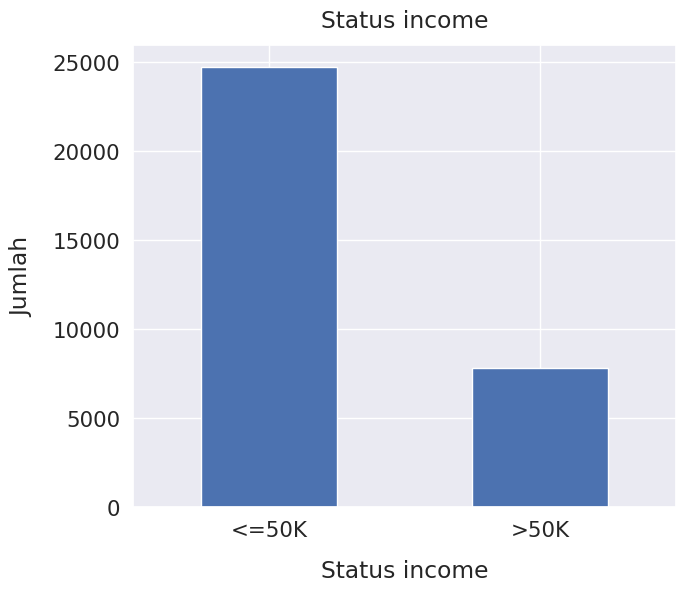

In [17]:
sns.set(font_scale=1.4)
dataset['income'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status income", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status income", y=1.02);

catatan: data yang terlihat adalah imbalanced learning

cek lebih jauh: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=id

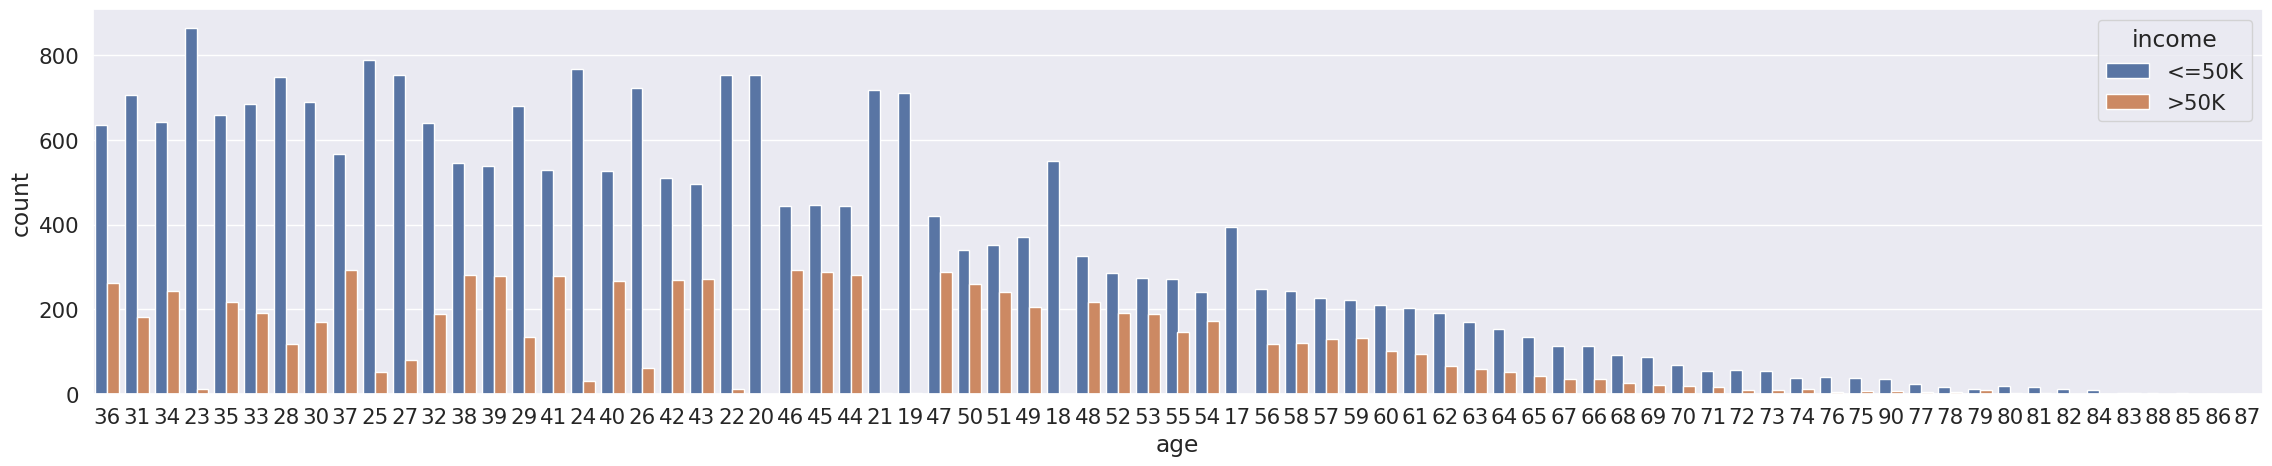

In [18]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['age'],order=dataset['age'].value_counts().index,hue=dataset['income'])
plt.show()

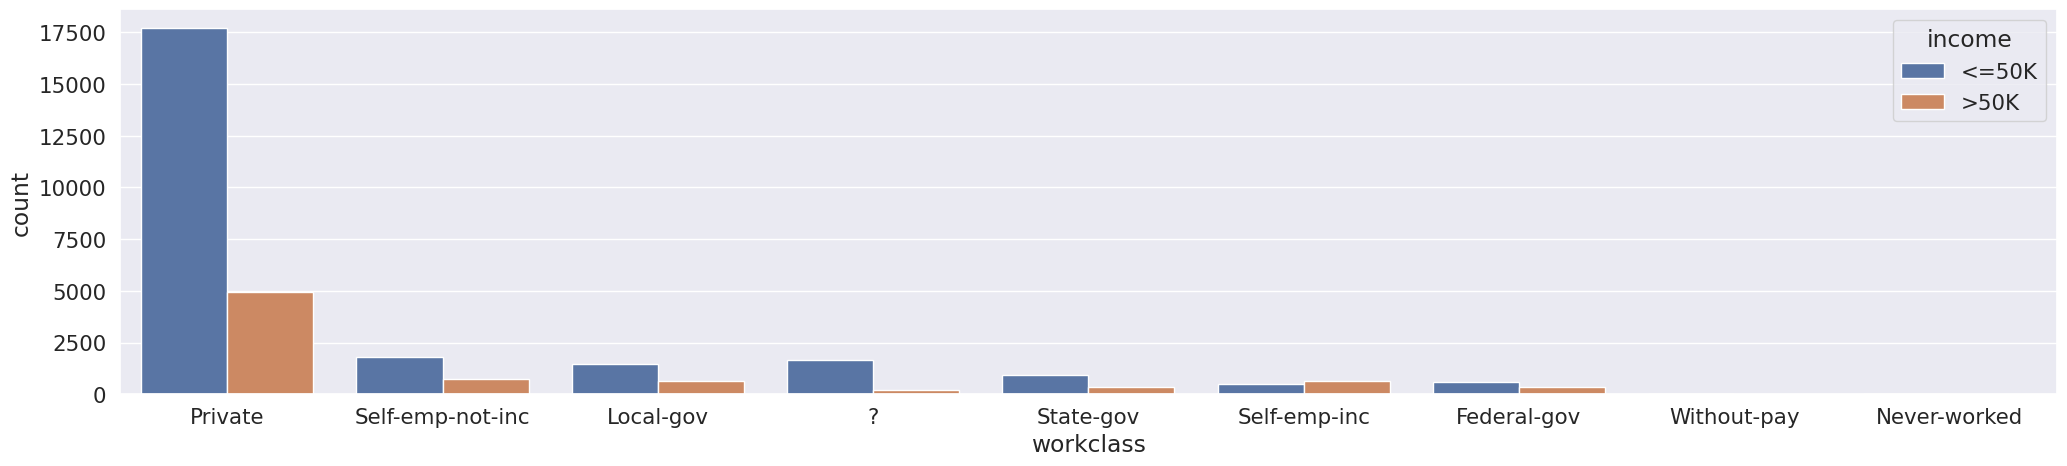

In [19]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['workclass'],order=dataset['workclass'].value_counts().index,hue=dataset['income'])
plt.show()

catatan: ada tanda <b>?</b> yang menunjukkan bahwa data tersebut hilang

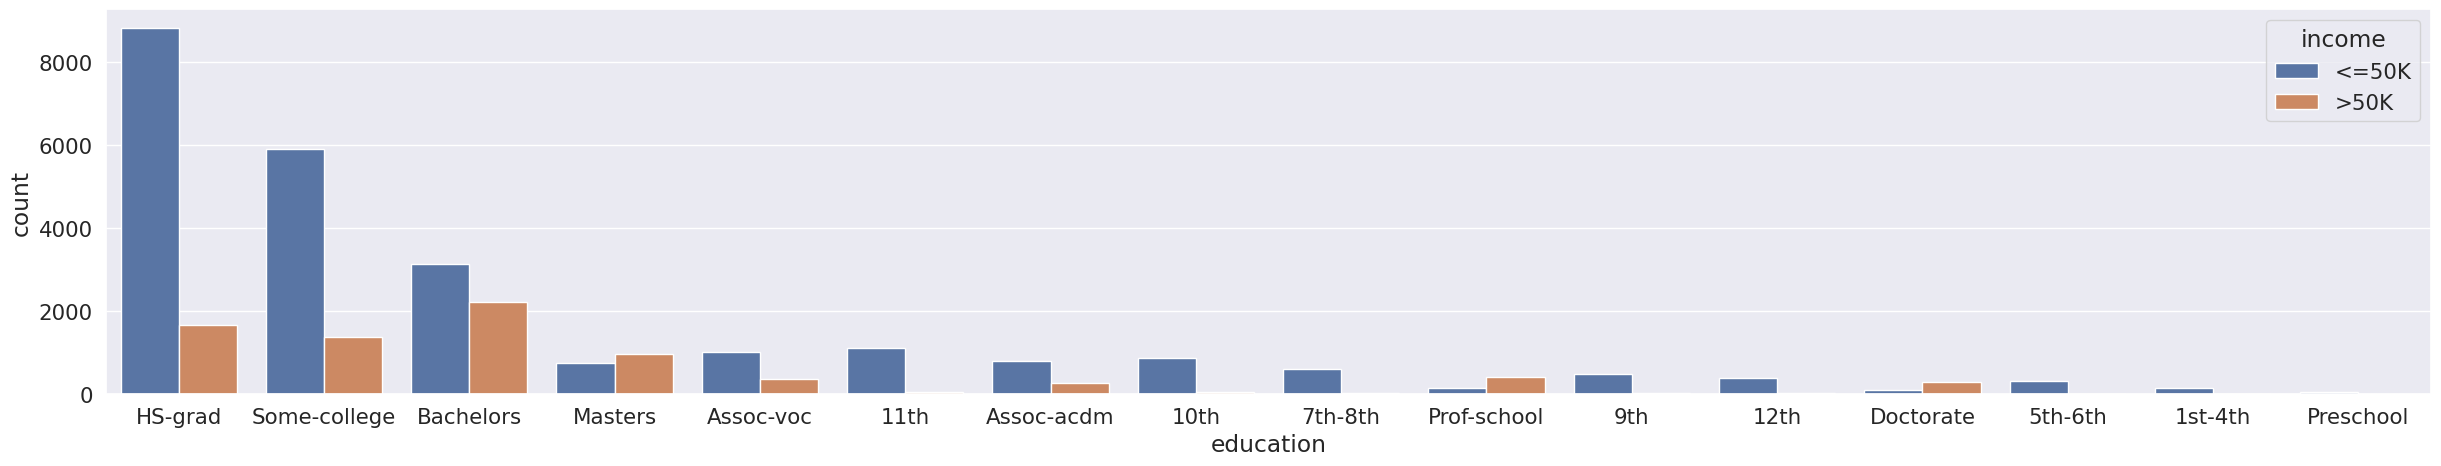

In [20]:
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['education'],order=dataset['education'].value_counts().index,hue=dataset['income'])
plt.show()

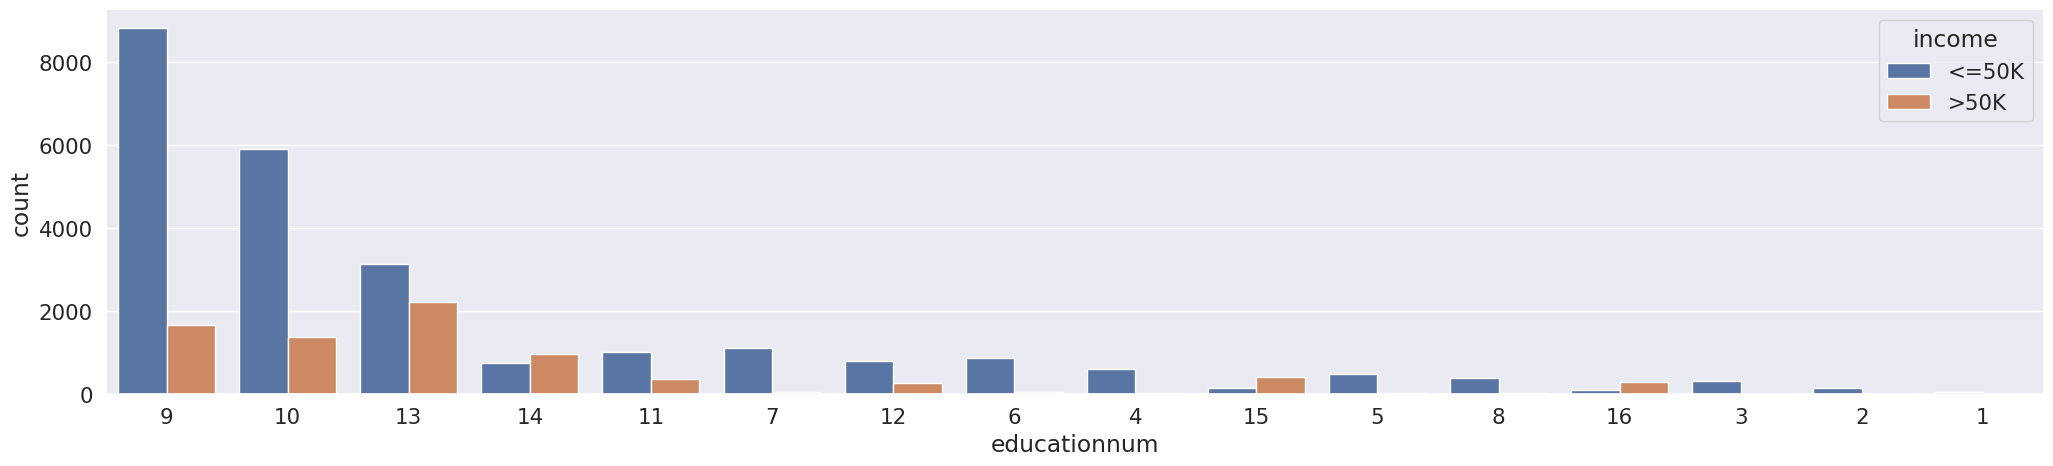

In [21]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['educationnum'],order=dataset['educationnum'].value_counts().index,hue=dataset['income'])
plt.show()

catatan: ternyata educationnum sama dengan education.

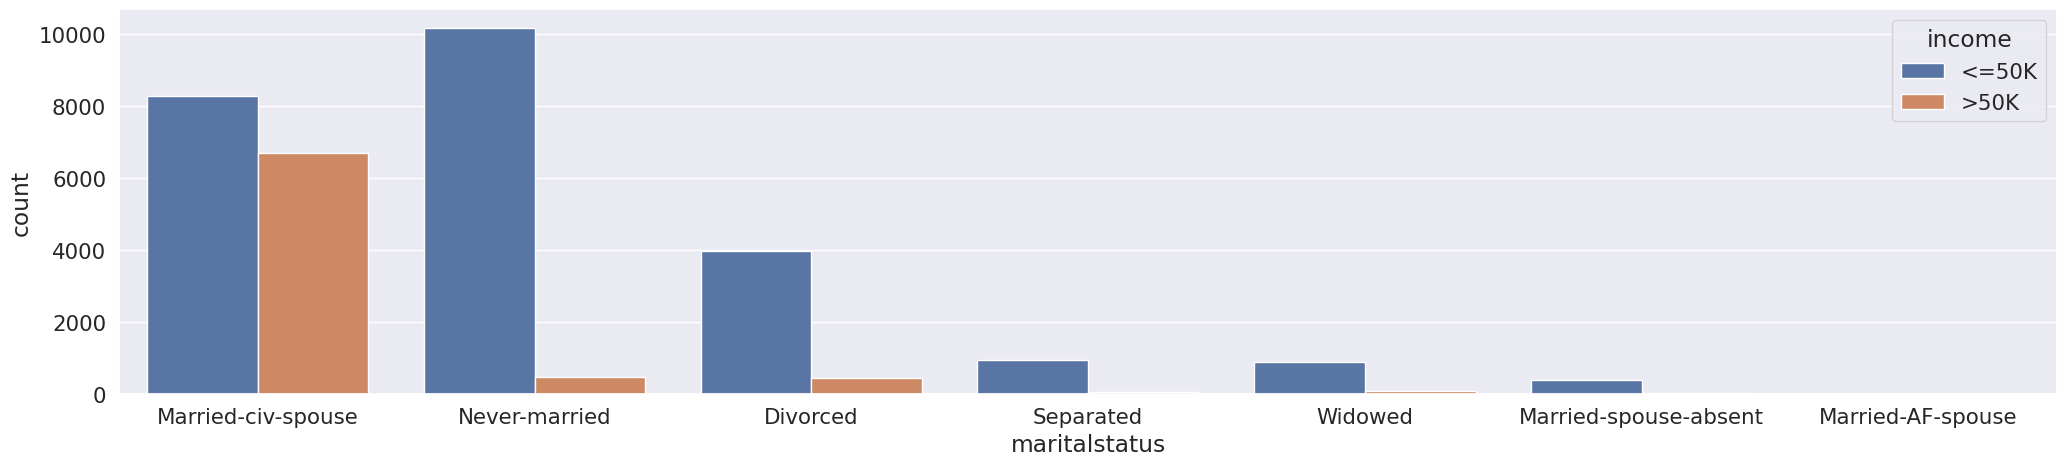

In [22]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['maritalstatus'],order=dataset['maritalstatus'].value_counts().index,hue=dataset['income'])
plt.show()

catatan: pada kenyataan, hanya ada 3 status marital: single, menikah, cerai. nanti akan kita perbaiki

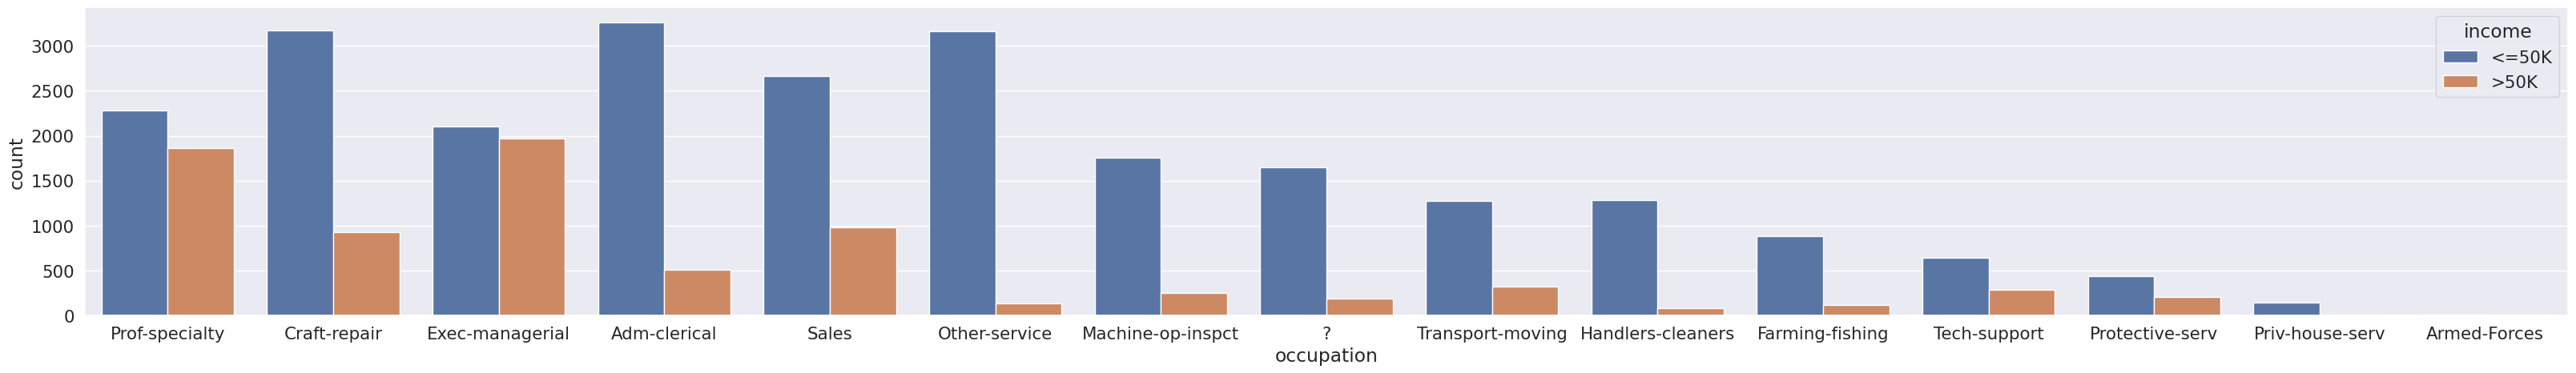

In [23]:
plt.subplots(figsize = (40,5))
sns.countplot(x=dataset['occupation'],order=dataset['occupation'].value_counts().index,hue=dataset['income'])
plt.show()

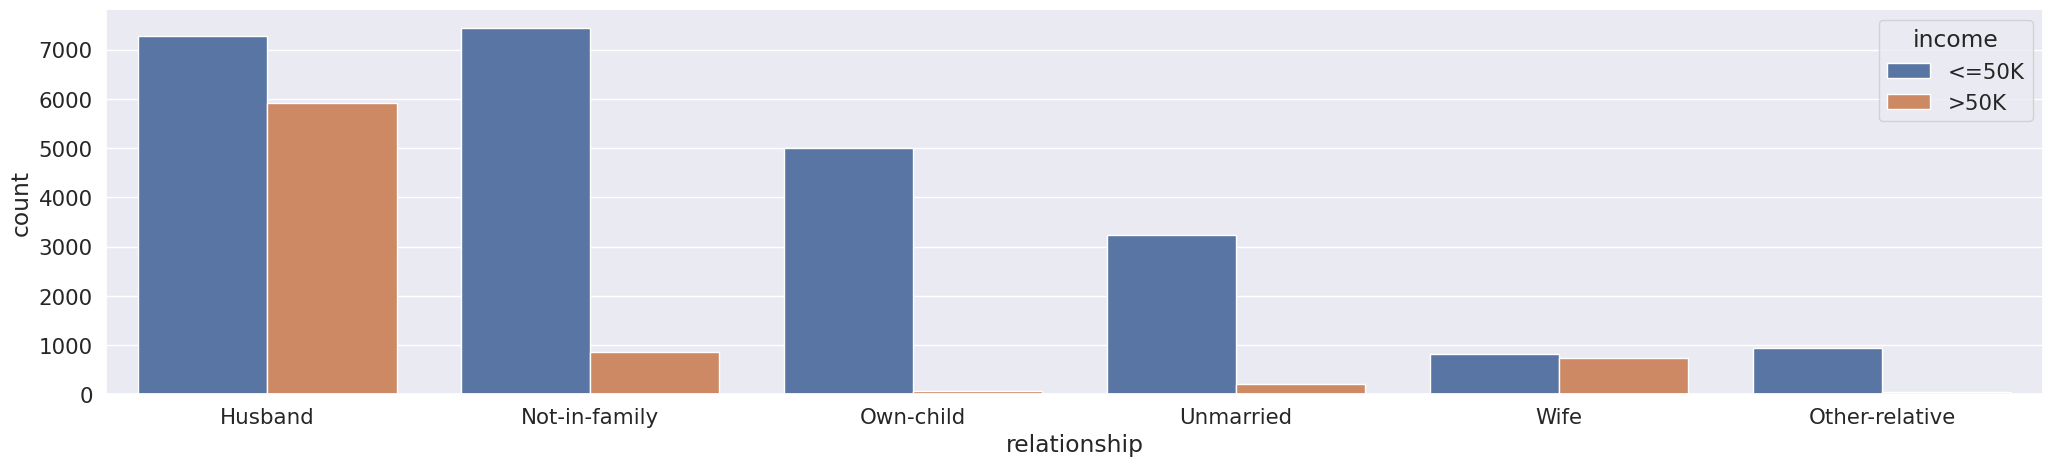

In [24]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['relationship'],order=dataset['relationship'].value_counts().index,hue=dataset['income'])
plt.show()

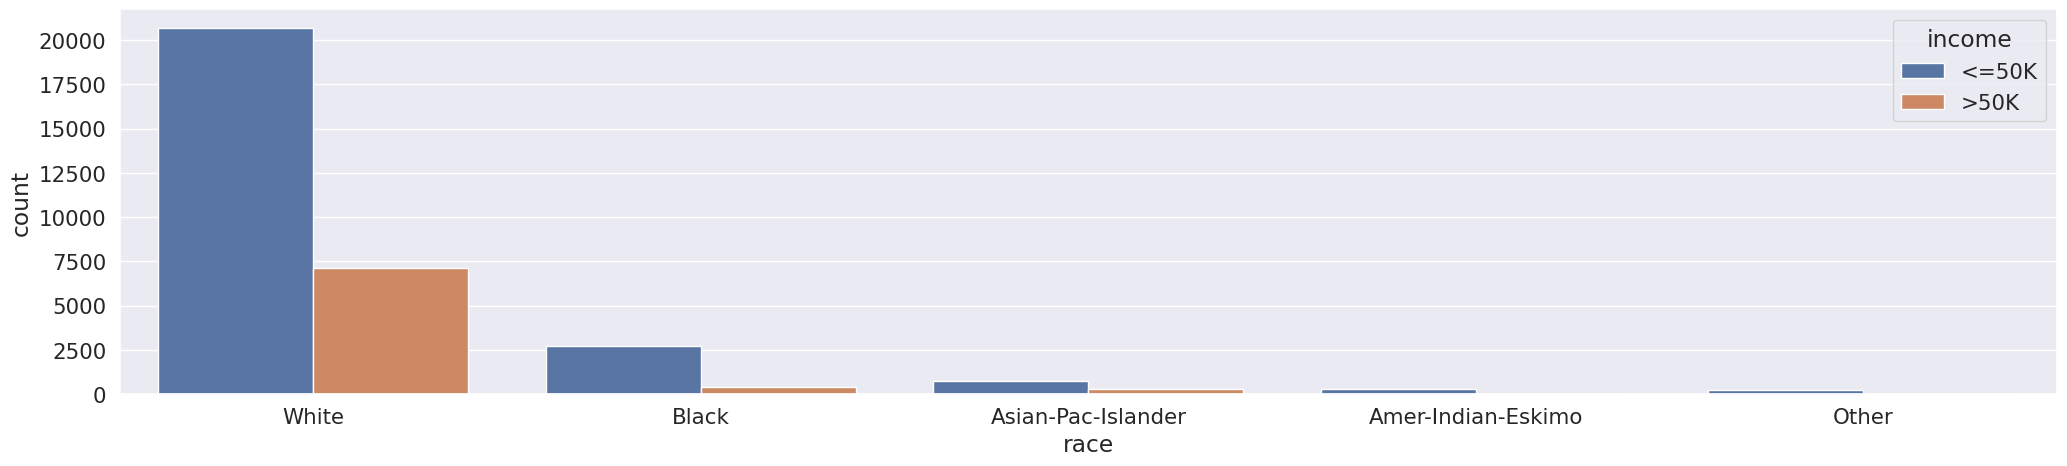

In [25]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['race'],order=dataset['race'].value_counts().index,hue=dataset['income'])
plt.show()

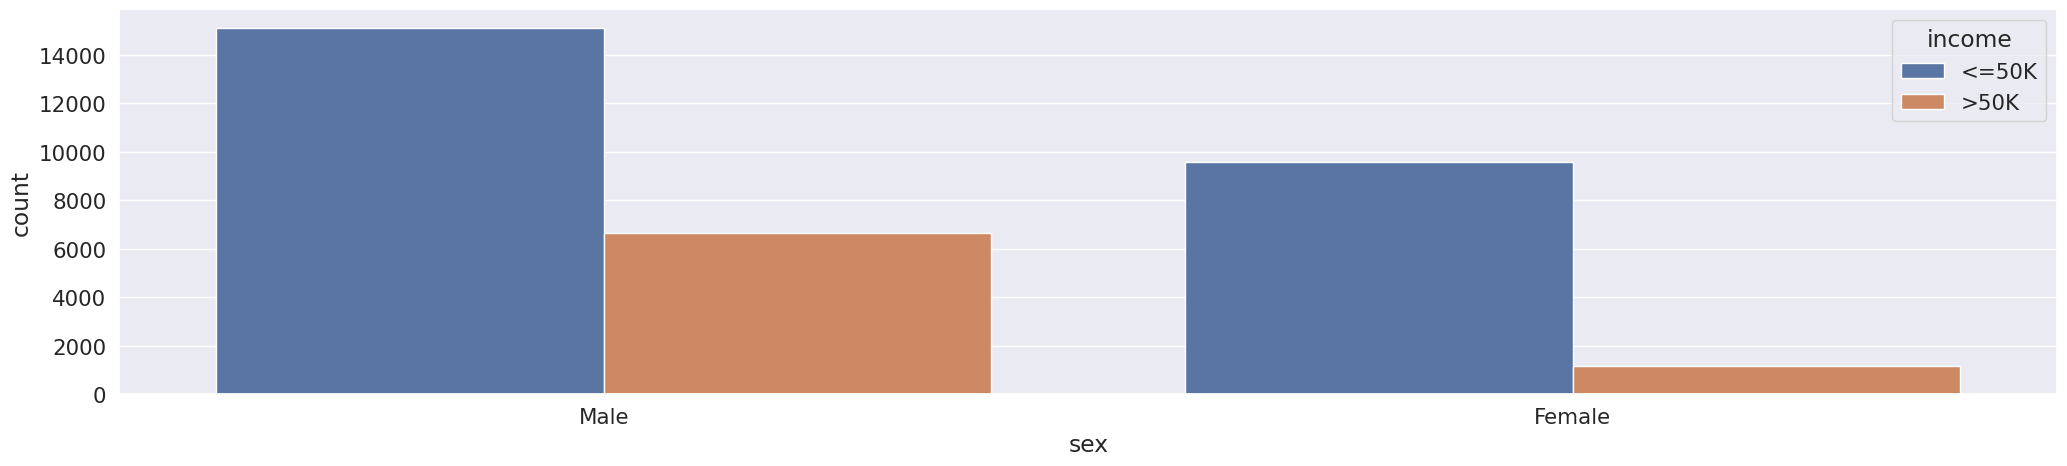

In [26]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['sex'],order=dataset['sex'].value_counts().index,hue=dataset['income'])
plt.show()

keterangan:
- capital gain, capital loss, hours per week, nativecountry, tidak diproses karena terlalu kecil


## Memvalidasi data
rangkuman yang bisa diambil dari temuan diatas:
- ada data yang hilang dan diberikan tanda <b>?</b>
- ada fitur yang mirip, yaitu education dan educationnum
- ada fitur yang kurang merepresentasikan kehidupan nyata, yaitu marital status

data-data diatas akan diperbaiki dibagian selanjutnya

## menentukan object data
- beberapa kolom akan dirubah formatnya sehingga bisa diproses oleh Python
- educationnum akan dihapus karena tumpang tindih dengan education
- akan dilakukan pengecekan data duplikat (records)
- akan dilakukan pengecekan fitur yang duplikat

## membersihkan data dan mengkonstruksi data

sebelum membersihkan data, ada baiknya data non numerik dijadikan numerik terlebih dahulu untuk mempermudah pemprosesan

### pengecekan atribut pada kolom

In [27]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
maritalstatus : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex : ['Male' 'Female']
nativecountry : ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'Engl

catatan:
- ada <b>nan</b> pada workclass dan kolom lain (waktu infografis tidak terlihat). saat kita cek di excel sebelumnya, ini adalah kelebihan records. maka bisa kita hapus
- ada tanda tanya


### me set nilai yang hilang agar mudah diperbaiki

In [28]:
dataset.replace("?", np.nan, inplace= True)

### merubah atribut kolom menjadi numerik

In [29]:
workclass = {'Never-worked':0,
             'Without-pay':1,
             'Self-emp-not-inc':2,
             'Self-emp-inc':3,
             'Private':4,
             'State-gov':5, 'Federal-gov':5, 'Local-gov':5
}

dataset['workclass'] = dataset['workclass'].map(workclass)

education = { 'Preschool':0, '1st-4th':1, '5th-6th':2,'7th-8th':3, '9th':4, '10th':5, '11th':6, '12th':7,
              'HS-grad':8,
              'Some-college':9, 'Assoc-acdm':9, 'Assoc-voc':9,
              'Bachelors':10,
              'Masters':11, 'Prof-school':11,
              'Doctorate':14
 }

dataset['education'] = dataset['education'].map(education)

maritalstatus = {'Never-married':0,
                 'Married-civ-spouse':1, 'Married-AF-spouse':1,
                 'Divorced':2,'Separated':2,
                 'Married-spouse-absent':3,'Widowed':3}

dataset['maritalstatus'] = dataset['maritalstatus'].map(maritalstatus)


occupation = {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3, 'Prof-specialty':4,
 'Other-service':5, 'Sales':6, 'Craft-repair':7, 'Transport-moving':8,
 'Farming-fishing':9, 'Machine-op-inspct':10, 'Tech-support':11,
 'Protective-serv':12, 'Armed-Forces':13, 'Priv-house-serv':14}

dataset['occupation'] = dataset['occupation'].map(occupation)

relationship = {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':0, 'Other-relative':5}

dataset['relationship'] = dataset['relationship'].map(relationship)

race ={'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5}

dataset['race'] = dataset['race'].map(race)

sex = {'Male':1, 'Female':0}

dataset['sex'] = dataset['sex'].map(sex)

nativecountry ={'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, 'Mexico':5, 'South':6,
 'Puerto-Rico':6, 'Honduras':7, 'England':8, 'Canada':9, 'Germany':10, 'Iran':11,
 'Philippines':12, 'Italy':13, 'Poland':14, 'Columbia':15, 'Cambodia':16, 'Thailand':17, 'Ecuador':18,
 'Laos':19, 'Taiwan':20, 'Haiti':21, 'Portugal':22, 'Dominican-Republic':23, 'El-Salvador':24,
 'France':25, 'Guatemala':26, 'China':27, 'Japan':28, 'Yugoslavia':29, 'Peru':30,
 'Outlying-US(Guam-USVI-etc)':31, 'Scotland':32, 'Trinadad&Tobago':33, 'Greece':34,
 'Nicaragua':35, 'Vietnam':36, 'Hong':37, 'Ireland':38, 'Hungary':39, 'Holand-Netherlands':40}

dataset['nativecountry'] = dataset['nativecountry'].map(nativecountry)

income = {'<=50K':0, '>50K':1}

dataset['income'] = dataset['income'].map(income)

### perbaiki nilai yang hilang

In [30]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['workclass', 'occupation', 'nativecountry'], dtype='object')

catatan: kita ingin tahu berapa persentase nilai yang hilang

In [31]:
import missingno

<Axes: >

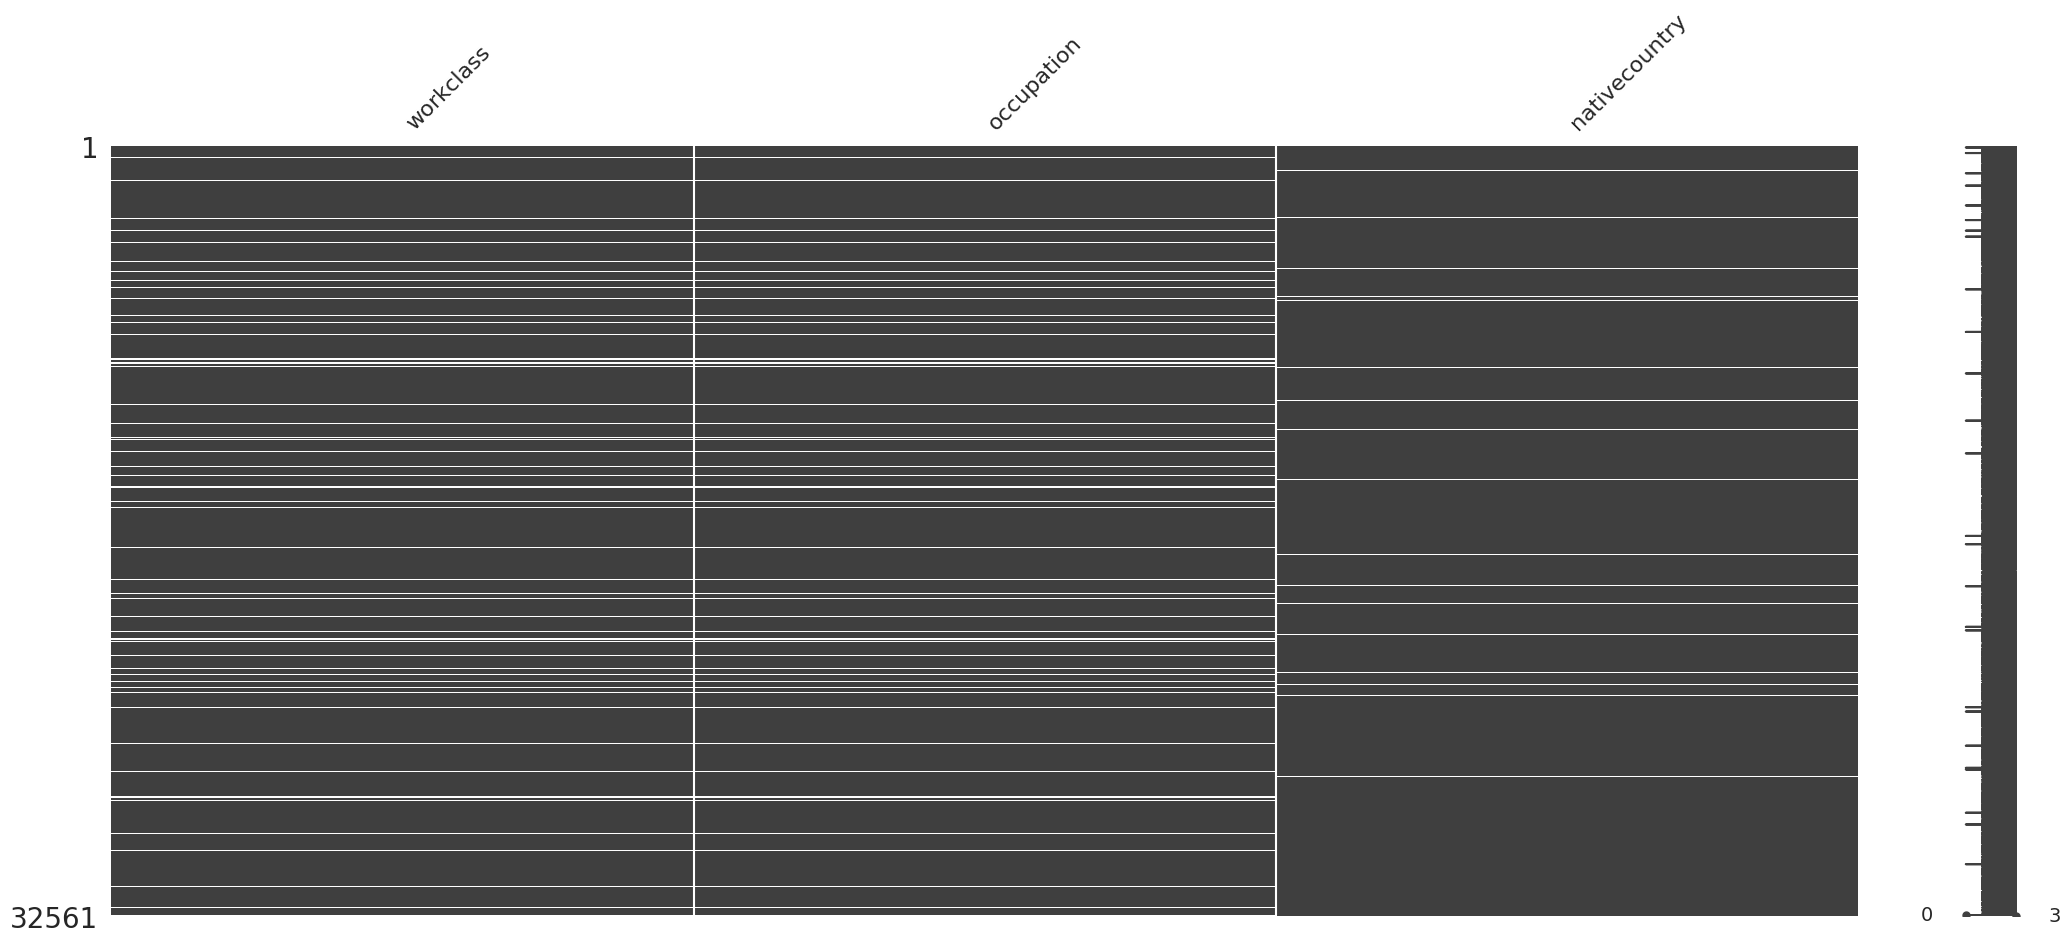

In [32]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [33]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

workclass        5.638647
occupation       5.660146
nativecountry    1.790486
dtype: float64

In [34]:
median_value=dataset['workclass'].median()
dataset['workclass']=dataset['workclass'].fillna(median_value)

median_value=dataset['occupation'].median()
dataset['occupation']=dataset['occupation'].fillna(median_value)

median_value=dataset['nativecountry'].median()
dataset['nativecountry']=dataset['nativecountry'].fillna(median_value)

In [35]:
# untuk mengecek nilai sudah terisi semua
dataset.loc[:, dataset.isnull().any()].columns

Index([], dtype='object')

### cek apakah ada fitur yang bernilai sama

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            32561 non-null  int64  
 1   workclass      32561 non-null  float64
 2   fnlwgt         32561 non-null  int64  
 3   education      32561 non-null  int64  
 4   educationnum   32561 non-null  int64  
 5   maritalstatus  32561 non-null  int64  
 6   occupation     32561 non-null  float64
 7   relationship   32561 non-null  int64  
 8   race           32561 non-null  int64  
 9   sex            32561 non-null  int64  
 10  capitalgain    32561 non-null  int64  
 11  capitalloss    32561 non-null  int64  
 12  hoursperweek   32561 non-null  int64  
 13  nativecountry  32561 non-null  float64
 14  income         32561 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


In [37]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            32561 non-null  int64  
 1   workclass      32561 non-null  float64
 2   fnlwgt         32561 non-null  int64  
 3   education      32561 non-null  int64  
 4   educationnum   32561 non-null  int64  
 5   maritalstatus  32561 non-null  int64  
 6   occupation     32561 non-null  float64
 7   relationship   32561 non-null  int64  
 8   race           32561 non-null  int64  
 9   sex            32561 non-null  int64  
 10  capitalgain    32561 non-null  int64  
 11  capitalloss    32561 non-null  int64  
 12  hoursperweek   32561 non-null  int64  
 13  nativecountry  32561 non-null  float64
 14  income         32561 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


catatan: tidak ada  fitur yang bernilai sama

### cek apakah ada records yang duplikat

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            32561 non-null  int64  
 1   workclass      32561 non-null  float64
 2   fnlwgt         32561 non-null  int64  
 3   education      32561 non-null  int64  
 4   educationnum   32561 non-null  int64  
 5   maritalstatus  32561 non-null  int64  
 6   occupation     32561 non-null  float64
 7   relationship   32561 non-null  int64  
 8   race           32561 non-null  int64  
 9   sex            32561 non-null  int64  
 10  capitalgain    32561 non-null  int64  
 11  capitalloss    32561 non-null  int64  
 12  hoursperweek   32561 non-null  int64  
 13  nativecountry  32561 non-null  float64
 14  income         32561 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


In [40]:
dataset = dataset.drop_duplicates()

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32535 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            32535 non-null  int64  
 1   workclass      32535 non-null  float64
 2   fnlwgt         32535 non-null  int64  
 3   education      32535 non-null  int64  
 4   educationnum   32535 non-null  int64  
 5   maritalstatus  32535 non-null  int64  
 6   occupation     32535 non-null  float64
 7   relationship   32535 non-null  int64  
 8   race           32535 non-null  int64  
 9   sex            32535 non-null  int64  
 10  capitalgain    32535 non-null  int64  
 11  capitalloss    32535 non-null  int64  
 12  hoursperweek   32535 non-null  int64  
 13  nativecountry  32535 non-null  float64
 14  income         32535 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 4.0 MB


### pengecekan tipe data
saat kita lihat, data sudah menjadi numerik. namun jika terdapat suatu kendala, misal data di pandas sudah berbentuk numerik, namun pada info masih menunjukkan object, silakan rubah dengan script berikut

<code>dataset['nama_kolom'] = dataset['nama_kolom'].astype(str).astype(float)</code>


### cek korelasi - hapus korelasi tingkat tinggi

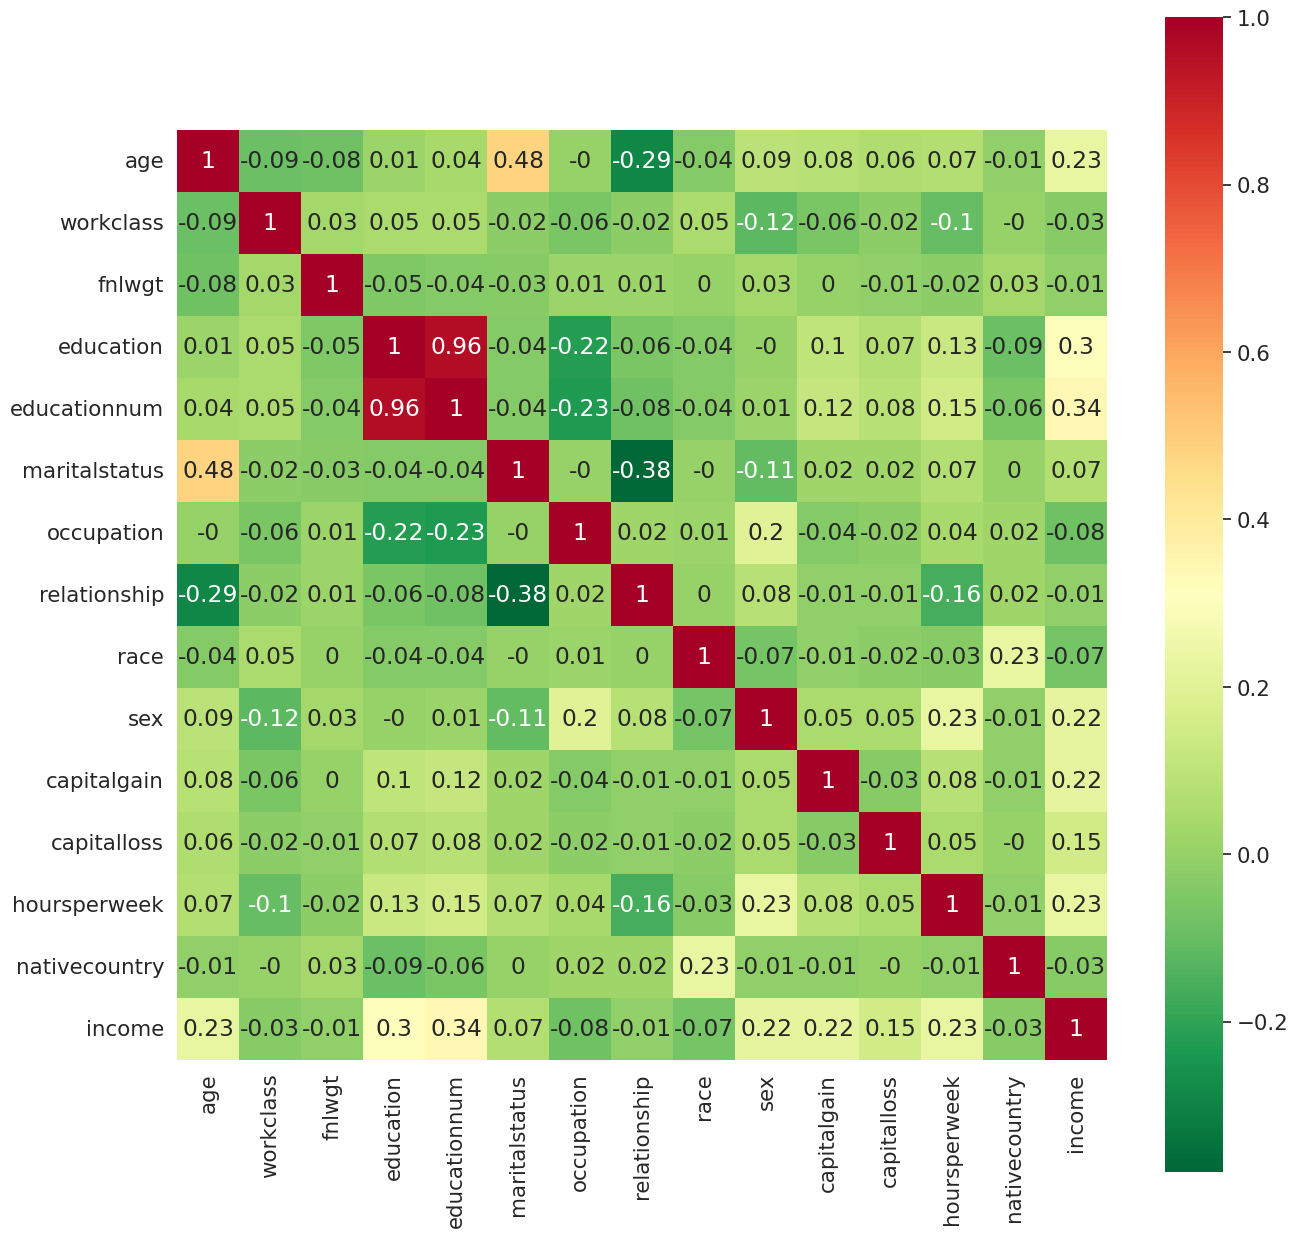

In [42]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

catatan: educationnum dengan education mendapatkan korelasi 0.96. maka bisa kita hapus

In [43]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(dataset, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  1


In [45]:
# removed correlated  features
dataset.drop(labels=corr_features, axis=1, inplace=True)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32535 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            32535 non-null  int64  
 1   workclass      32535 non-null  float64
 2   fnlwgt         32535 non-null  int64  
 3   education      32535 non-null  int64  
 4   maritalstatus  32535 non-null  int64  
 5   occupation     32535 non-null  float64
 6   relationship   32535 non-null  int64  
 7   race           32535 non-null  int64  
 8   sex            32535 non-null  int64  
 9   capitalgain    32535 non-null  int64  
 10  capitalloss    32535 non-null  int64  
 11  hoursperweek   32535 non-null  int64  
 12  nativecountry  32535 non-null  float64
 13  income         32535 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.7 MB


catatan: bisa juga menggunakan kode berikut:

<code>dataset = dataset.drop('educationnum', axis=1)</code>

## menentukan label data

In [47]:
X = dataset.drop(columns=['income'])

In [48]:
X

,age,workclass,fnlwgt,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,5.0,77516,10,0,1.0,1,1,1,2174,0,40,1.0
1,50,2.0,83311,10,1,2.0,2,1,1,0,0,13,1.0
2,38,4.0,215646,8,2,3.0,1,1,1,0,0,40,1.0
3,53,4.0,234721,6,1,3.0,2,2,1,0,0,40,1.0
4,28,4.0,338409,10,1,4.0,3,2,0,0,0,40,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4.0,257302,9,1,11.0,3,1,0,0,0,38,1.0
32557,40,4.0,154374,8,1,10.0,2,1,1,0,0,40,1.0
32558,58,4.0,151910,8,3,1.0,0,1,0,0,0,40,1.0
32559,22,4.0,201490,8,0,1.0,4,1,1,0,0,20,1.0


In [49]:
Y = dataset['income']

In [50]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32535, dtype: int64

<img src="https://live.staticflickr.com/65535/52438712492_b3281efee5_b.jpg" width="923" height="228" alt="gb1 (1)"/>

### perlakuan data original

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

### perlakuan data normalisasi
link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [52]:
X_norm = StandardScaler().fit_transform(X)
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,Y, test_size=0.1, random_state=42)

### perlakuan data imbalanced learning (disini seluruh data diproses SMOTE)

In [53]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [54]:
print(Counter(Y_train))

Counter({0: 22221, 1: 7060})


In [55]:
print(Counter(Y_test))

Counter({0: 2475, 1: 779})


In [56]:
oversample = SMOTE(sampling_strategy='auto')

In [57]:
X_smote, Y_smote = oversample.fit_resample(X, Y)

In [58]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote,Y_smote, test_size=0.1, random_state=42)

In [59]:
print(Counter(Y_train_smote))

Counter({1: 22236, 0: 22216})


In [60]:
print(Counter(Y_test_smote))

Counter({0: 2480, 1: 2460})


## membangun model

In [61]:
# untuk decision tree
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,10),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [62]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

### pemodelan data original

In [63]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [64]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [65]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        min_samples_leaf=3, random_state=42))])

In [66]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 9
model__min_samples_leaf: 3
model__min_samples_split: 2
model__random_state: 42


### pemodelan data normalisasi

In [67]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [68]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

### pemodelan data SMOTE

In [69]:
smote_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [70]:
smote_classifier_dt.fit(X_train_smote,Y_train_smote.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

## evaluasi hasil pemodelan

### evaluasi hasil dari model original

In [71]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.8597042450735972
Precision pada training set:  0.8597042450735972
Recall pada training set:  0.8597042450735972
Akurasi pada test set:  0.8558696988322065
Precision pada test set:  0.8558696988322065
Recall pada test set:  0.8558696988322065


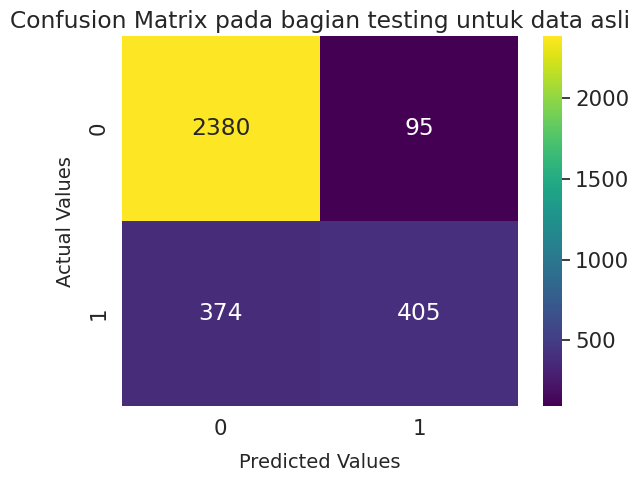

In [72]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### evaluasi hasil dari model normalisasi

In [73]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.8597042450735972
Precision pada training set:  0.8597042450735972
Recall pada training set:  0.8597042450735972
Akurasi pada test set:  0.8561770129071912
Precision pada test set:  0.8561770129071912
Recall pada test set:  0.8561770129071912


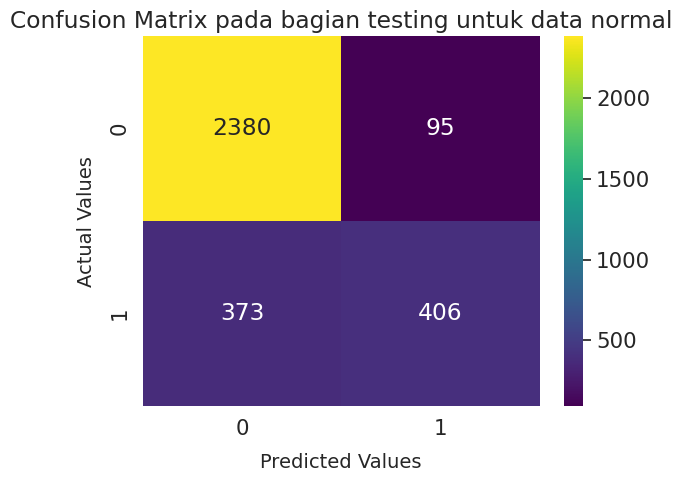

In [74]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal')
plt.show()

### evaluasi hasil dari pemodelan menggunakan SMOTE

In [75]:
ori_y_pred_dt_train_smote = smote_classifier_dt.predict(X_train_smote)

ori_accuracy_dt_train_smote = accuracy_score(Y_train_smote,ori_y_pred_dt_train_smote)
print('Akurasi pada training set: ', ori_accuracy_dt_train_smote)

ori_precision_dt_train_smote = precision_score(Y_train_smote,ori_y_pred_dt_train_smote, average='micro')
print('Precision pada training set: ', ori_precision_dt_train_smote)

ori_recall_dt_train_smote = recall_score(Y_train_smote,ori_y_pred_dt_train_smote, average='micro')
print('Recall pada training set: ', ori_recall_dt_train_smote)

ori_y_pred_dt_test_smote = smote_classifier_dt.predict(X_test_smote)

ori_accuracy_dt_test_smote = accuracy_score(Y_test_smote,ori_y_pred_dt_test_smote)
print('Akurasi pada test set: ', ori_accuracy_dt_test_smote)

ori_precision_dt_test_smote = precision_score(Y_test_smote,ori_y_pred_dt_test_smote, average='micro')
print('Precision pada test set: ', ori_precision_dt_test_smote)

ori_recall_dt_test_smote = recall_score(Y_test_smote,ori_y_pred_dt_test_smote, average='micro')
print('Recall pada test set: ', ori_recall_dt_test_smote)

Akurasi pada training set:  0.8506703860343742
Precision pada training set:  0.8506703860343742
Recall pada training set:  0.8506703860343742
Akurasi pada test set:  0.8465587044534413
Precision pada test set:  0.8465587044534413
Recall pada test set:  0.8465587044534413


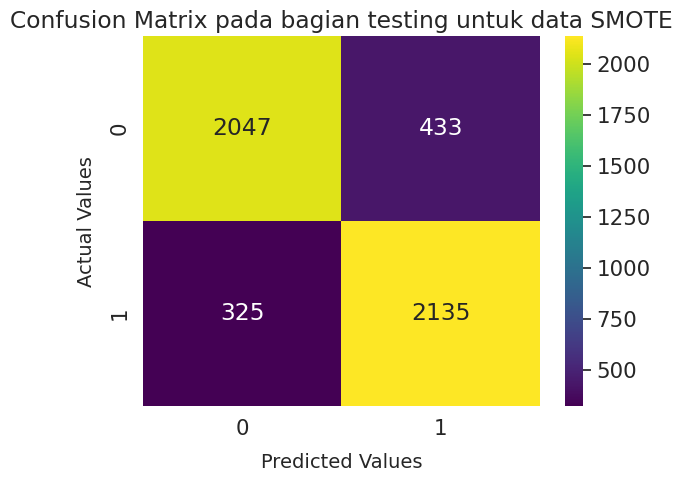

In [76]:
sns.heatmap(confusion_matrix(Y_test_smote,ori_y_pred_dt_test_smote),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data SMOTE')
plt.show()

### pelaporan evaluasi

In [77]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Machine Learning Data SMOTE', ori_accuracy_dt_train_smote, ori_accuracy_dt_test_smote),
         ]

In [78]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.859704,0.855870
1,Machine Learning Data Normalisasi,0.859704,0.856177
2,Machine Learning Data SMOTE,0.850670,0.846559


In [79]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Machine Learning Data SMOTE', ori_accuracy_dt_test_smote, ori_recall_dt_test_smote, ori_precision_dt_test_smote),
                    ]

In [80]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.855870,0.855870,0.855870
1,Machine Learning Data Normalisasi,0.856177,0.856177,0.856177
2,Machine Learning Data SMOTE,0.846559,0.846559,0.846559


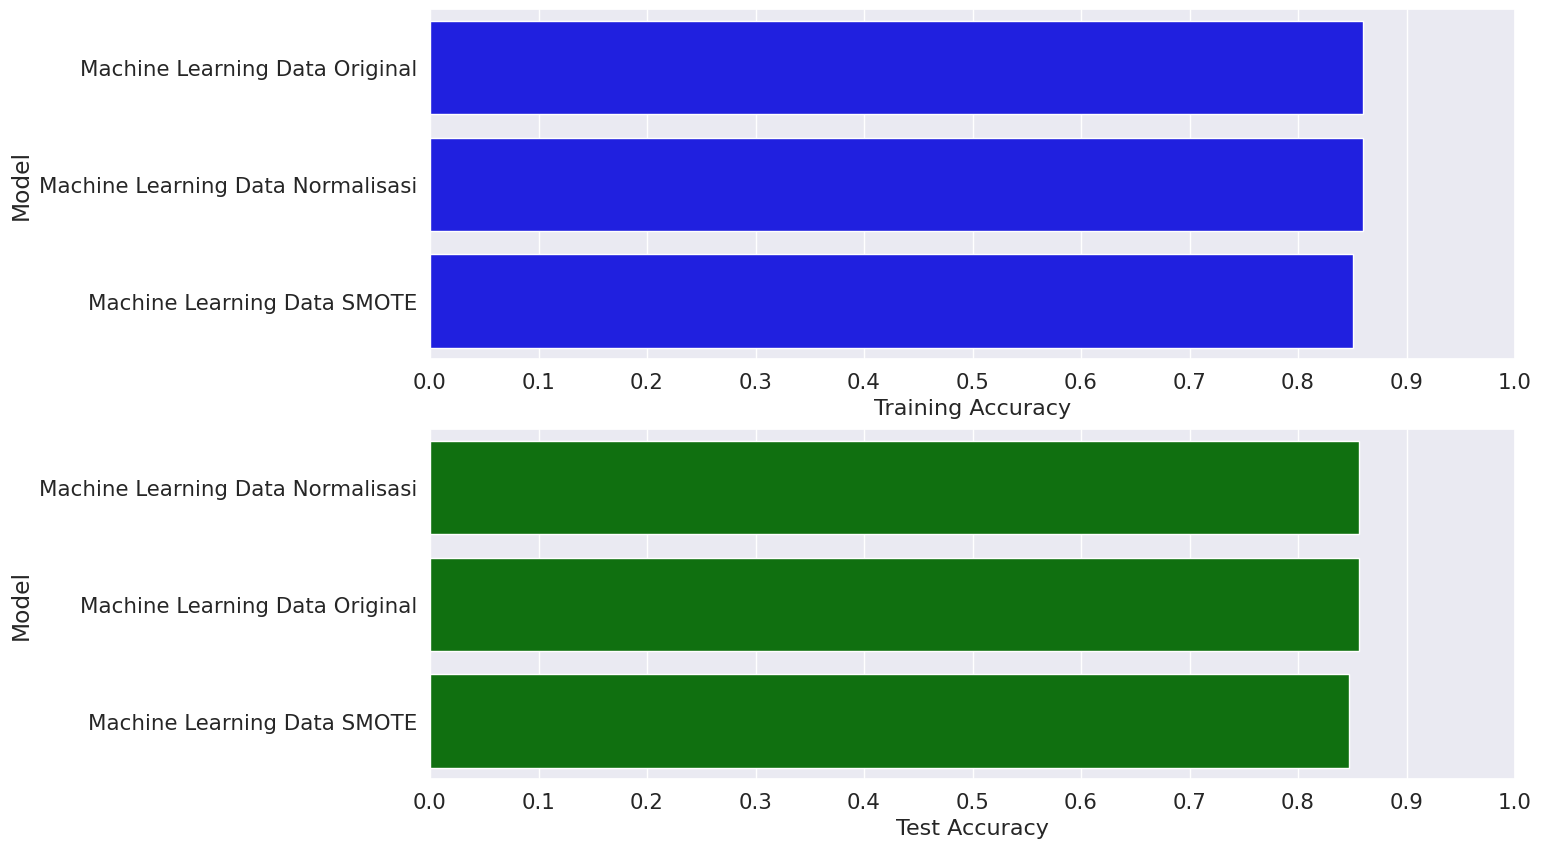

In [81]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, color='blue', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, color='green', ax = axes[1], hue=None)
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### pelaporan fitur terbaik

In [82]:
from sklearn import tree

In [83]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    return df_features_importance.sort_values(by='coef',ascending=False)


In [84]:
Analize_Feature(ori_classifier_dt,X_test)

,name,coef
4,maritalstatus,0.413000
3,education,0.200486
9,capitalgain,0.193417
0,age,0.063686
10,capitalloss,0.059799
11,hoursperweek,0.039455
2,fnlwgt,0.008467
8,sex,0.008390
5,occupation,0.008238
6,relationship,0.002113


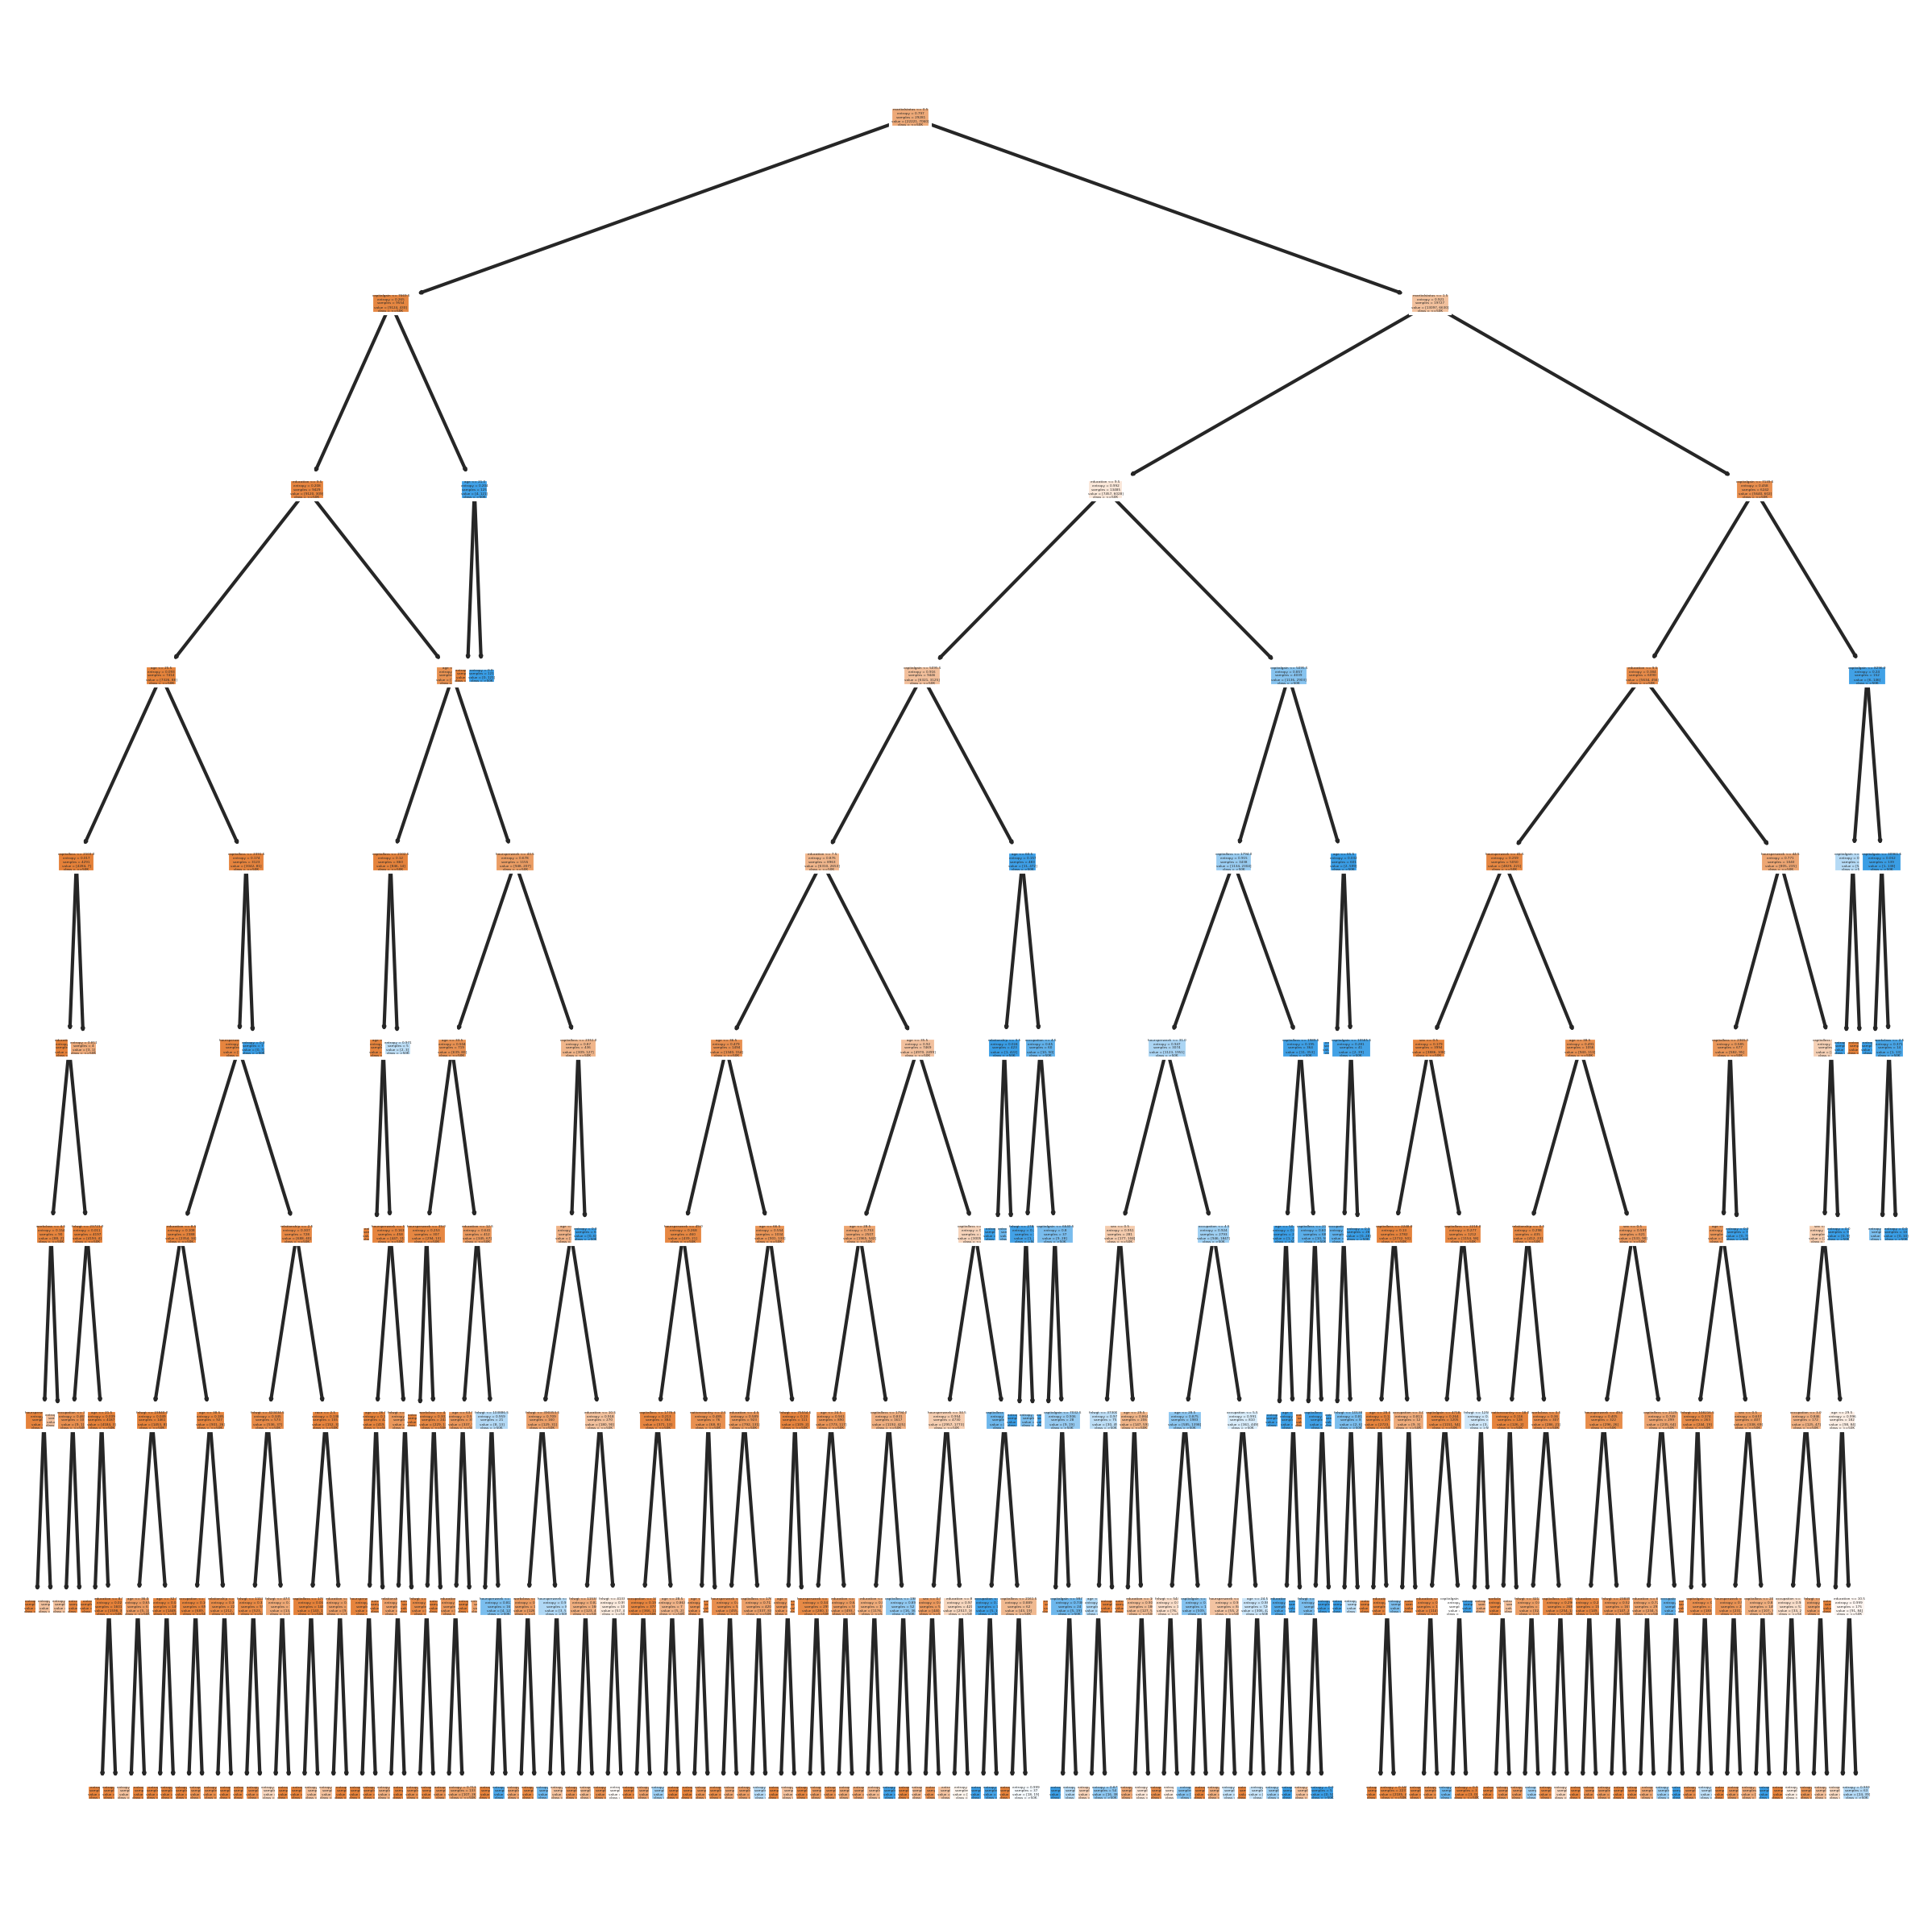

In [85]:
fn=["age","workclass","fnlwgt","education","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","nativecountry"]
cn=['<=50K', '>50K']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('/content/drive/My Drive/Colab Notebooks/workshop/hasil_tree.png')